In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms

Conversion Rates:
 group
A    0.37
B    0.44
Name: conversion_rate, dtype: float64

T-statistic: -1.005822465506109
P-value: 0.3157285882472735

Result: Fail to reject the null hypothesis. There is no significant difference between the two groups.


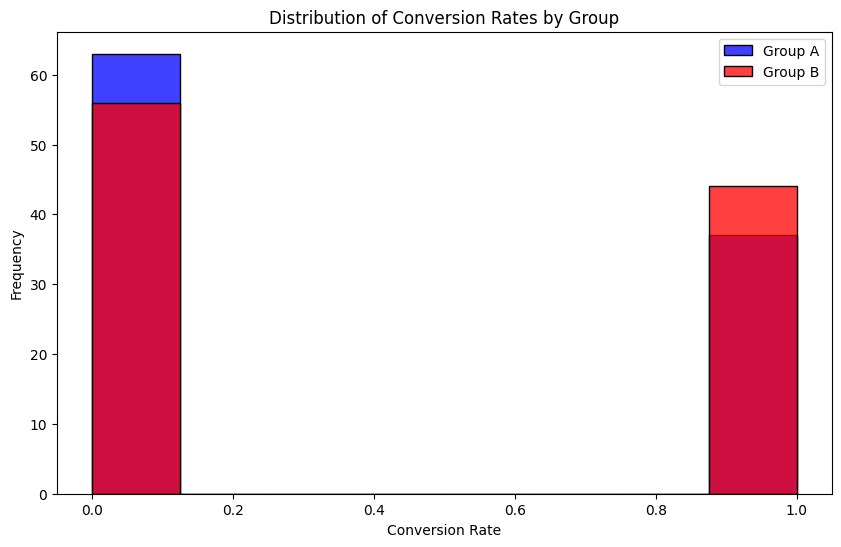

Cohen's d: -0.14224477720582843

Confidence Interval for Group A: (0.2737185338396045, 0.4662814661603955)
Confidence Interval for Group B: (0.3410098664856729, 0.5389901335143271)


In [2]:
# Step 1: Create a DataFrame with sample data
np.random.seed(42)
group_size = 200
group = np.random.choice(['A', 'B'], size=group_size)
conversion_rate = np.random.binomial(1, p=[0.35 if g == 'A' else 0.45 for g in group])

data = pd.DataFrame({
    'group': group,
    'conversion_rate': conversion_rate
})

# Step 2: Calculate the conversion rates for each group
conversion_rates = data.groupby('group')['conversion_rate'].mean()
print("Conversion Rates:\n", conversion_rates)

# Step 3: Perform an independent t-test
group_a = data[data['group'] == 'A']['conversion_rate']
group_b = data[data['group'] == 'B']['conversion_rate']
t_stat, p_val = stats.ttest_ind(group_a, group_b)
print("\nT-statistic:", t_stat)
print("P-value:", p_val)

# Step 4: Interpret the results
alpha = 0.05
if p_val < alpha:
    print("\nResult: Reject the null hypothesis. There is a significant difference between the two groups.")
else:
    print("\nResult: Fail to reject the null hypothesis. There is no significant difference between the two groups.")

# Additional Analysis

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(data[data['group'] == 'A']['conversion_rate'], kde=False, color='blue', label='Group A')
sns.histplot(data[data['group'] == 'B']['conversion_rate'], kde=False, color='red', label='Group B')
plt.legend()
plt.title('Distribution of Conversion Rates by Group')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.show()

# Effect Size (Cohen's d)
mean_a = group_a.mean()
mean_b = group_b.mean()
std_a = group_a.std()
std_b = group_b.std()
n_a = len(group_a)
n_b = len(group_b)

# Pooled standard deviation
pooled_std = np.sqrt(((n_a - 1) * std_a**2 + (n_b - 1) * std_b**2) / (n_a + n_b - 2))

# Cohen's d
cohen_d = (mean_a - mean_b) / pooled_std
print("Cohen's d:", cohen_d)

# Confidence Intervals
ci_a = sms.DescrStatsW(group_a).tconfint_mean()
ci_b = sms.DescrStatsW(group_b).tconfint_mean()

print("\nConfidence Interval for Group A:", ci_a)
print("Confidence Interval for Group B:", ci_b)
